In [1]:
import numpy as np
import sys
import os

from joblib import load

sys.path.append(os.path.abspath('Hipp-LFP-embedding/'))
from hipp_embedding import embedding, trajectory

pca_model = load('Hipp-LFP-embedding/models/pca') 
embedding_model = load('Hipp-LFP-embedding/models/iso') 

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline


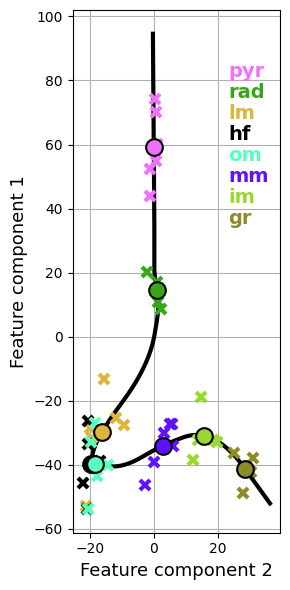

In [79]:

# --- Build the trajectory and project control points ---
traj, ctrlpts_proj, ctrlpts_labels = trajectory.define_trajectory(pca_model, embedding_model)

# --- Identify true anatomical layers (ignore interpolated points) ---
layeris = [i for i, label in enumerate(ctrlpts_labels) if '_interp' not in label]
layer_labels = [ctrlpts_labels[i] for i in layeris]

# --- Compute mean projection across mice ---
meanproj_layer = np.nanmean(ctrlpts_proj, axis=0)

# --- Assign a unique color to each anatomical layer ---
# convert the CMYK data there to something python will understand
layer_colors = {'pyr': np.array([0.949, 0.439, 1.000]),
                'rad': np.array([0.212, 0.655, 0.086]),
                'lm' : np.array([0.867, 0.710, 0.239]),
                'hf' : np.array([0.000, 0.000, 0.000]),
                'om' : np.array([0.349, 1.000, 0.749]),
                'mm' : np.array([0.376, 0.067, 1.000]),
                'im' : np.array([0.596, 0.851, 0.184]),
                'gr' : np.array([0.557, 0.545, 0.161])}

plt.figure(figsize=(3, 6))

# Plot the full interpolated trajectory
plt.plot(traj[:, 1], traj[:, 0], color='k', lw=3)

# Plot per-mouse projections for each layer
for i in layeris:
    label = ctrlpts_labels[i]
    color = layer_colors[label]
    plt.plot(ctrlpts_proj[:, i, 1], ctrlpts_proj[:, i, 0], 'x', color=color, mew=3, markersize=7)

# Plot mean location for each layer
for i in layeris:
    label = ctrlpts_labels[i]
    color = layer_colors[label]
    plt.plot(meanproj_layer[i, 1], meanproj_layer[i, 0],
         marker='o', linestyle='none',
         markerfacecolor=color, markeredgecolor='black',
         markeredgewidth=1.5, markersize=12)

for i, label in enumerate(layer_labels):
    plt.text(
        .75, 0.9 - i * 0.04,    
        label,
        transform=plt.gca().transAxes,
        fontsize=14,
        fontweight='bold',
        color=layer_colors[label],
        verticalalignment='top'
    )

plt.grid(True)
plt.axis('equal')
plt.xlabel('Feature component 2', fontsize=13)
plt.ylabel('Feature component 1', fontsize=13)
plt.tight_layout()

In [80]:
import numpy
import scipy
import sklearn
import joblib
import matplotlib

print("numpy:", numpy.__version__)
print("scipy:", scipy.__version__)
print("scikit-learn:", sklearn.__version__)
print("joblib:", joblib.__version__)
print("matplotlib:", matplotlib.__version__)


numpy: 1.23.5
scipy: 1.15.2
scikit-learn: 1.2.2
joblib: 1.4.2
matplotlib: 3.10.1
